# QUESTIONS 1
**Selected question :** How does the frequency of mental health illness and attitudes towards mental health vary by geographic location, and what are the strongest predictors of mental health illness and specific attitudes towards mental health in the workplace?

<a href='#Question'> 1.Question:</a>

<a href='#Data collection'> 2.Data collection:</a>

<a href='#Data cleaning/Preprocess'> 3.Data cleaning/ Preprocess:</a>

<a href='#Analysis'> 4.Analysis:</a>

<a href='#Visualisation:'> 5.Visualisation:</a>

<a href='#Insight:'> 6.Insight:</a>

***
<a id='Question'></a>
## 1.Question

Mental health

### Stack holders , How interest this data analysis. 
**Empolyer:** Company owner and high level managers would more concerning mental illness because of mental illness can lead to more negative consequences than physical illness. Specially for tech companies, for instance if their worker has physical disability, they can facilite to working eniviroiments for those staffs. However, mental illness is difficult to identify.Even employee who has mental illness, didn't know own mental health condition. Therefore, tech compnanies try to find soluion for mental health of their current staff or new empolyees. That data analysis will identify strongest predictors mental health.

**Non-profit organizatios:** One of example is OSMI. That kind orgizations tend to help people who has any level of mental illnes.Therefore, the organizations try undenstantand attitudes of mental illness.

**Goverment/Healh care system:** Mental health is one the major emerging issue. Also they have similarly intend to find strongest predictors of mental health illness. 

Before begin data analysis, I have descided to divide given questions into three sub questions. That can be staigthforward to answers questions.

Following specific quesions can be help to answer main question
1. What is the frequency of each geographic location (countries and states)? Which countries have highest number of mental illnes?
2. Which factor can be strongest predictors of mental health illness?
3. What is the specific attitudes towards mental health in the workplace?


***
<a id='Data collection'></a>
## 2.Data collection

In [215]:
#installing libraries
!pip install folium


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [267]:

# importing all necessary libraries.
import pandas as pd
import folium
import seaborn as sns



pd.set_option('display.max_columns', 100)


Before begin I have checked both 2014 an 2016 survey from Open Sourcing mental illness/OSMI/. But 2014 survey didn't include clear indication of mentall illness. Despite 2016 survey asked **Do you currently have a mental health disorder?**. That question will help to analyse attitude of  mentall illness condition in tech work place. 
      
      Data source : Kaagle.com
- Percentage of population with mental disorer by each country. Year between 1990-2019
 Source : [ourworldindata.org](https://ourworldindata.org/mental-health)



In [271]:

# reading 2006 survey data that would be help to compare the changes of attitudes.
df_survey=pd.read_csv('mental-heath-in-tech-2016.csv')

#Percentage of population with mental disorer by year andeach country.
#df_population=pd.read_csv('share-with-mental-and-substance-disorders.csv')
us_state = open("US_states.py", "r")


In [270]:
#Let's look at each datasets. 
#We don't need to show entire dataset. It should be enought for first 3 records of each datasets.

print("The dataset has %d rows and %d columns" %(df_survey_2016.shape[0], df_survey_2016.shape[1]))
df_survey_2016.head(3)
# Column names are too long, it is more like discriptions. We need change it to short.


The dataset has 1433 rows and 63 columns


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

***
<a id='Data cleaning/Preprocess'></a>
## 3.Data cleaning/Preprocess

Firsly, we need check general tendency of dataset, such as what is the percentage of missing data, determing the values of categorical datas. 


In [272]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
Are you self-employed?                                                                                                                                                              1433 non-null int64
How many employees does your company or organization have?                                                                                                                          1146 non-null object
Is your employer primarily a tech company/organization?                                                                                                                             1146 non-null float64
Is your primary role within your company related to tech/IT?                                                                                                                        263 non-null float64
Does your employer provide mental health benefits as part of healthcare coverage?        

### Re

In [ ]:
# Firstly. I have changed long columns names into short sentences. 
df_survey_2016.rename(columns={'What country do you live in?':'Country',
                               'Are you self-employed?':'self_employed',
       'How many employees does your company or organization have?':'no_employees',
       'Is your employer primarily a tech company/organization?':'is_tech_company',
       'Is your primary role within your company related to tech/IT?':'is_tech_role',
       'Does your employer provide mental health benefits as part of healthcare coverage?':'mental_health_benefits',
       'Do you know the options for mental health care available under your employer-provided coverage?':'care_options',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'wellness_program',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':'seek_help',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?':'anonymity_protected',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be':'leave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?':'mental_health_consequence',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?':'phys_health_consequence',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?':'discuss_coworkers',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?':'discuss_supervisor',
       'Do you feel that your employer takes mental health as seriously as physical health?':'mental_vs_physical',
       'What is your age?':'age', 'What is your gender?':'gender',
       'What US state or territory do you live in?':'state',
       'What country do you work in?':'country',
       'What US state or territory do you work in?':'state_work',
       'Which of the following best describes your work position?':'position',
       'Do you work remotely?':'remote_work'
                              },inplace=True)

df_survey_2016=df_survey_2016[['Country'
                ,'self_employed'
                ,'no_employees'
                ,'is_tech_company'
                ,'is_tech_company'
                ,'mental_health_benefits'
                ,'care_options'
                ,'wellness_program'
                ,'seek_help'
                ,'anonymity_protected'
                ,'mental_health_consequence'
                ,'phys_health_consequence'
                ,'discuss_coworkers'
                ,'discuss_supervisor'
                ,'mental_vs_physical'
                ,'age'
                ,'gender'
                ,'state'
                ,'position'
                ,'remote_work']]

In [273]:
df_survey.describe(include=['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another indivi

In [222]:
df_survey.Age

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

### Handling with Null values

'state', 'work_interfere', and 'comments' columns have null values. Also those three columns includes not numerical values. It is difficulty to estimating categorical null values.In this case I just replaced "Not Specified". If columns which has numeric value, we can handle using with different methodology, such as filled with avarage values and calculating interpolite.

In [223]:
df_survey.fillna("Not Specified", inplace=True)

### Checking oulier values and data transforming
Let's check whith distict value of each columns of data. That can reveal abnormal values.

In [224]:
# starts from Age columns. Counting distict values is easy way to check abnormal values.
df_survey.Age.value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

Removing abnormal values is not good idea. Let see row of those abnormal ages.

In [225]:
# select indexes 
df_survey[(df_survey['Age']<18)|(df_survey['Age']>100)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,Not Specified,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,Not Specified
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,Not Specified
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,Not Specified,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,Not Specified
715,2014-08-28 10:07:53,-1726,male,United Kingdom,Not Specified,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,Not Specified
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,Not Specified,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,Not Specified
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


I have dropped those rows because they also inpputed wrong value in 'Gender' as well. It seems like resort of information should be unvalueble.

In [226]:
# select indexes of 
df_survey.drop( df_survey[(df_survey['Age']<18)|(df_survey['Age']>100)].index, inplace=True)

Then 'Age' columns needs to discretize categorical types. That is can be more useful for data analysis in this case.

In [227]:
df_survey['Age_cat']=df_survey.Age.apply(lambda x:('18-24' if x<25 else ('25-34' if x<35 else ('35-44' if x<45 else ('45-54' if x<55 else 'More than 55')))))
# lets look at number of each age categories.
df_survey.Age_cat.value_counts()

25-34           707
35-44           320
18-24           156
45-54            51
More than 55     17
Name: Age_cat, dtype: int64

In [228]:
df_survey.Age

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1251, dtype: int64

In [229]:
# lets check Gender columns
df_survey.Gender.value_counts()
# gender looks much more worst than age. Lets fix Gender columns

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
Female                                              2
Mail                                                1
cis male                                            1
Genderqueer                                         1
femail                      

In [230]:
# I have created list for each genders catergories. 
#Some of inputted genders are difficult to recognising. So I have new category named "Not Specified"

male_str=["male","M","Make",'Cis Man',"Male ","Mail",'Malr',"Cis Male","Male (CIS)","Mal","Man","m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans_str=["trans-female","Female ","Femake","Female (trans)","Enby","Male-ish","Guy (-ish) ^_^","Neuter","non-binary", "enby","Female (cis)","Trans-female","Trans woman","Trans","fluid", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)"]
female_str=["cis female",'Cis Female',"Woman","F", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other_str=["Nah","Androgyne","Agender","Genderqueer","something kinda male?", "ostensibly male, unsure what that really means", "queer/she/they","nah", "all", "queer"]

# replaced unstructured 
df_survey['Gender'] = df_survey['Gender'].apply(lambda x:"Male" if x in male_str else x)
df_survey['Gender'] = df_survey['Gender'].apply(lambda x:"Female" if x in female_str else x)
df_survey['Gender'] = df_survey['Gender'].apply(lambda x:"Trans" if x in trans_str else x)
df_survey['Gender'] = df_survey['Gender'].apply(lambda x:"Not Specified" if x in other_str else x)

# check results
df_survey.Gender.value_counts()

Male             985
Female           243
Trans             15
Not Specified      8
Name: Gender, dtype: int64

Now gender table looks more structured

'country' and 'state columns looks good sturtured as well as rest of columns have not includes missing and wrong datas.

In [231]:
#In dataset 2016 name of united states has different words, need to change this.

df_survey.replace(to_replace='United States', value='United States of America',inplace=True)
df_survey.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_cat
0,2014-08-27 11:29:31,37,Female,United States of America,IL,Not Specified,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Not Specified,35-44
1,2014-08-27 11:29:37,44,Male,United States of America,IN,Not Specified,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,Not Specified,35-44


In [232]:
# Changing US states short names into full name 

states_dic = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
df_survey.replace({"state": states_dic},inplace=True)

In [233]:
### Removed unnecessary columns 

df_survey.drop(columns=['Timestamp','Age','comments'],inplace=True
            )
# timestamp : unnecessary In this context timestamp is not 
# Age : converted to categorical value
# comments : Number of null values 

### Data cleaning: OSMI Survey 2016

In [234]:
print("The 2016 has %s rows and %s columns"%(df_survey_2016.shape[0],df_survey_2016.shape[1]))

The 2016 has 1433 rows and 63 columns


So, that dataset has 63 columns some features not nessary for this data analysis as well as I have selected columns which has same meanings. 

### Data cleaning: Percentage of population with mental disorer by each country

In [235]:
# Firstly. I have changed long columns names into short sentences. 
df_survey_2016.rename(columns={'What country do you live in?':'Country',
                               'Are you self-employed?':'self_employed',
       'How many employees does your company or organization have?':'no_employees',
       'Is your employer primarily a tech company/organization?':'is_tech_company',
       'Is your primary role within your company related to tech/IT?':'is_tech_role',
       'Does your employer provide mental health benefits as part of healthcare coverage?':'mental_health_benefits',
       'Do you know the options for mental health care available under your employer-provided coverage?':'care_options',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'wellness_program',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':'seek_help',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?':'anonymity_protected',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be':'leave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?':'mental_health_consequence',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?':'phys_health_consequence',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?':'discuss_coworkers',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?':'discuss_supervisor',
       'Do you feel that your employer takes mental health as seriously as physical health?':'mental_vs_physical',
       'What is your age?':'age', 'What is your gender?':'gender',
       'What US state or territory do you live in?':'state',
       'What country do you work in?':'country',
       'What US state or territory do you work in?':'state_work',
       'Which of the following best describes your work position?':'position',
       'Do you work remotely?':'remote_work'
                              },inplace=True)

df_survey_2016=df_survey_2016[['Country'
                ,'self_employed'
                ,'no_employees'
                ,'is_tech_company'
                ,'is_tech_company'
                ,'mental_health_benefits'
                ,'care_options'
                ,'wellness_program'
                ,'seek_help'
                ,'anonymity_protected'
                ,'mental_health_consequence'
                ,'phys_health_consequence'
                ,'discuss_coworkers'
                ,'discuss_supervisor'
                ,'mental_vs_physical'
                ,'age'
                ,'gender'
                ,'state'
                ,'position'
                ,'remote_work']]

***
<a id='Analysis'></a>
## 4.Analysis

### 1. What is the frequency of each geographic location (countries and states)? Which countries have highest number of mental illnes?

#### Top 10 highest number of mental illness of each countries in 2014

this section analysed top frequented mental countries from 2014 and 2016 datasets.

In [236]:
# What is the frequency of each geographic location (countries)?
# counting ech countries.
count=df_survey.Country.value_counts()
count_2016=df_survey_2016.Country.value_counts()

#calculating percentege, that can helps for looking for porpotions of total illness.  
percent=df_survey.Country.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent_2016=df_survey_2016.Country.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
 
# comparing result of both years in same dataframe
df_country_percent=pd.DataFrame({'Count_2014':count
                                 ,'Percent_2014':percent
                                ,'Count_2016':count_2016
                                 ,'Percent_2016':percent_2016})
df_country_percent=df_country_percent.sort_values(by='Count_2016',ascending=False).head(10)
df_country_percent

,Count_2014,Percent_2014,Count_2016,Percent_2016
United States of America,746.0,59.6%,840.0,58.6%
United Kingdom,184.0,14.7%,180.0,12.6%
Canada,72.0,5.8%,78.0,5.4%
Germany,45.0,3.6%,58.0,4.0%
Netherlands,27.0,2.2%,48.0,3.3%
Australia,21.0,1.7%,35.0,2.4%
Sweden,7.0,0.6%,19.0,1.3%
France,13.0,1.0%,16.0,1.1%
Ireland,27.0,2.2%,15.0,1.0%
Switzerland,7.0,0.6%,10.0,0.7%


Majority of mental illness recorded in **United State**.Try to investigate more deeply and look at for US states.

### Top 10 highest number of mental illness in US states

Now look at which US states has higest mental illness records in 2014 and 2016.

In [237]:
# What is the frequency of each geographic location (US states)?

count_2014=df_survey[df_survey.Country=='United States of America'].state.value_counts()
count_2016=df_survey_2016[df_survey_2016.Country=='United States of America'].state.value_counts()

percent_2014=df_survey[df_survey.Country=='United States of America'].state.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent_2016=df_survey_2016[df_survey_2016.Country=='United States of America'].state.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'


df_state_2014=pd.DataFrame({'Count_2014':count_2014
                                 ,'Percent_2014':percent_2014})
df_state_2016=pd.DataFrame({'Count_2016':count_2016
                         ,'Percent_2016':percent_2016})


df_top5_usstates=pd.DataFrame({'Count_2014':count_2014
                                 ,'percent_2014':percent_2014
                                ,'Count_2016':count_2016
                                 ,'ercent_2016':percent_2016})
df_top5_usstates=df_top5_usstates.sort_values(by='Count_2014',ascending=False).head(10)

# Sorted by highest number states
df_state_2016=df_state_2016.sort_values(by='Count_2016',ascending=False).reset_index()
df_state_2014=df_state_2014.sort_values(by='Count_2014',ascending=False).reset_index()

df_state_2016.rename(columns={'index':'States'},inplace=True)
df_state_2014.rename(columns={'index':'States'},inplace=True)

#then concatnate with both years.
pd.concat([df_state_2014,df_state_2016],axis=1).head(7)

,States,Count_2014,Percent_2014,States,Count_2016,Percent_2016
0,California,138.0,18.5%,California,130,15.5%
1,Washington,70.0,9.4%,Illinois,56,6.7%
2,New York,56.0,7.5%,Michigan,48,5.7%
3,Tennessee,45.0,6.0%,New York,45,5.4%
4,Texas,44.0,5.9%,Washington,43,5.1%
5,Pennsylvania,29.0,3.9%,Texas,43,5.1%
6,Oregon,29.0,3.9%,Minnesota,42,5.0%


### Total disterbution of countries


In [238]:
df_survey.Country.value_counts()

United States of America    746
United Kingdom              184
Canada                       72
Germany                      45
Ireland                      27
Netherlands                  27
Australia                    21
France                       13
India                        10
New Zealand                   8
Sweden                        7
Switzerland                   7
Poland                        7
Italy                         7
Brazil                        6
South Africa                  6
Belgium                       6
Israel                        5
Singapore                     4
Bulgaria                      4
Mexico                        3
Finland                       3
Russia                        3
Austria                       3
Portugal                      2
Denmark                       2
Colombia                      2
Croatia                       2
Greece                        2
Japan                         1
Spain                         1
Romania 

### 2.Which factor can be strongest predictors of mental health illness?


I assume that following two columns can predict severity of mental illness. I as understood all 
    'treatment': if 

In [239]:
#
df_survey.describe(include=['O'])

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_cat
count,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
unique,4,46,46,3,2,2,5,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,5
top,Male,United States of America,Not Specified,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,25-34
freq,985,746,513,1091,762,632,464,289,880,1025,473,499,837,641,815,561,487,920,771,512,1003,555,574,1070,707


In [240]:
contingency_table=pd.crosstab(df_survey['treatment'],df_survey['self_employed'])
contingency_table

self_employed,No,Not Specified,Yes
treatment,,,
No,543,9,67
Yes,548,9,75


In [241]:
df_survey.care_options

0       Not sure
1             No
2             No
3            Yes
4             No
          ...   
1254          No
1255         Yes
1256         Yes
1257         Yes
1258         Yes
Name: care_options, Length: 1251, dtype: object

In [242]:
df_survey.no_employees.value_counts()

6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: no_employees, dtype: int64

In [243]:
df_survey.describe(include=['object'])

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_cat
count,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
unique,4,46,46,3,2,2,5,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,5
top,Male,United States of America,Not Specified,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,25-34
freq,985,746,513,1091,762,632,464,289,880,1025,473,499,837,641,815,561,487,920,771,512,1003,555,574,1070,707


In [244]:
df_1=df_survey[['treatment','work_interfere']]

In [245]:
df = pd.DataFrame({'treatment': df_survey['treatment'], 'work_interfere': df_survey['mental_health_consequence']}, dtype='category')
df_num = df.apply(lambda x: x.cat.codes)

In [246]:
df_num.corr()

,treatment,work_interfere
treatment,1.000000,0.027054
work_interfere,0.027054,1.000000


In [247]:
df_2=df_survey.iloc[:,2:10]

In [248]:
df_2

,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company
0,Illinois,Not Specified,No,Yes,Often,6-25,No,Yes
1,Indiana,Not Specified,No,No,Rarely,More than 1000,No,No
2,Not Specified,Not Specified,No,No,Rarely,6-25,No,Yes
3,Not Specified,Not Specified,Yes,Yes,Often,26-100,No,Yes
4,Texas,Not Specified,No,No,Never,100-500,Yes,Yes
...,...,...,...,...,...,...,...,...
1254,Not Specified,No,No,Yes,Not Specified,26-100,No,Yes
1255,Illinois,No,Yes,Yes,Often,26-100,Yes,Yes
1256,California,No,Yes,Yes,Sometimes,More than 1000,No,Yes
1257,North Carolina,No,No,No,Not Specified,100-500,Yes,Yes


In [249]:
contingency_table

self_employed,No,Not Specified,Yes
treatment,,,
No,543,9,67
Yes,548,9,75


In [250]:
df = pd.DataFrame({'treatment': df_survey['treatment'], 
                   'age': df_survey['Age_cat']}, dtype='category')
df_num = df.apply(lambda x: x.cat.codes)
print("Pearson:", df_num.corr())

Pearson:            treatment       age
treatment   1.000000  0.080084
age         0.080084  1.000000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 2 columns):
treatment    1251 non-null category
age          1251 non-null category
dtypes: category(2)
memory usage: 12.5 KB


In [252]:
df.treatment.cat

In [253]:
df = pd.DataFrame({'treatment': df_survey['treatment'], 
                   'age': df_survey['Age_cat']}, dtype='category')
df_num = df.apply(lambda x: x.cat.codes)
print("Pearson:", df_num.corr())

Pearson:            treatment       age
treatment   1.000000  0.080084
age         0.080084  1.000000


***
<a id='Visualisation'></a>
## 4.Visualisation

### 

In [254]:
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master'
country_geo = f'{url}/countries.geo.json'
m = folium.Map(zoom_start=13)# Creating Folium map.

folium.Choropleth(
    geo_data=country_geo,# assinging spacial data
    name='choropleth',
    data=df_country_percent, #assinging data
    columns=[df_country_percent.index,'Count_2014'],
    key_on='properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='The number of mental illness in Survey'
).add_to(m)
folium.LayerControl().add_to(m)
m

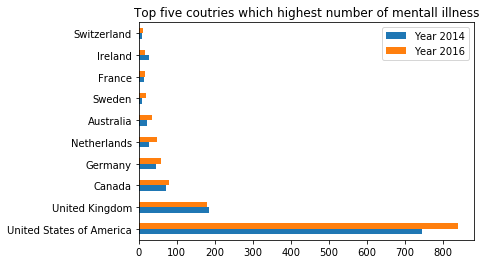

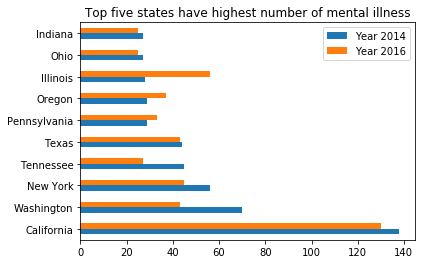

In [255]:
df_country_percent.rename(columns={'Count_2014':'Year 2014',
                                  'Count_2016':'Year 2016'}).plot(kind='barh',
                       title='Top five coutries which highest number of mentall illness');
df_top5_usstates.head(10).rename(columns={'Count_2014':'Year 2014',
                                  'Count_2016':'Year 2016'}).plot(kind='barh',
                       title='Top five states have highest number of mental illness');

***
<a id='Insight'></a>
## 5.Insight

* The United States of America is highest number mental illness and the United Kingdom and Canada follows.
* In the survey, California, Washington and, New York are highest mental illness. That can be related with a number of IT and tech compnanies located in those states. By 2016, number of mentall illness was slithly reduced in Washington, NewYork, Tennesse, despite number of illness was increased in Illinois.
* However, More than 85% of participants only from top five countries. Especially from US and UK, they have 75%. It might be related that OSMI orginization originally founded in US. The survey not includes Asian developed countries much. Only one person was participanted from Japan.  

### Reference


In [256]:
# testing with naive bayesian disterbuions.
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.metrics import accuracy_score

In [257]:
df_survey

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_cat
0,Female,United States of America,Illinois,Not Specified,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,35-44
1,Male,United States of America,Indiana,Not Specified,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,35-44
2,Male,Canada,Not Specified,Not Specified,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,25-34
3,Male,United Kingdom,Not Specified,Not Specified,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,25-34
4,Male,United States of America,Texas,Not Specified,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,Male,United Kingdom,Not Specified,No,No,Yes,Not Specified,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,25-34
1255,Male,United States of America,Illinois,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,25-34
1256,Male,United States of America,California,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,25-34
1257,Female,United States of America,North Carolina,No,No,No,Not Specified,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,45-54


In [258]:
data=df_survey[['treatment','family_history','tech_company','remote_work']]

In [259]:
data['family_history']=data['family_history'].apply(lambda x:1 if x =="Yes" else 0) # encoding data
data['tech_company']=data['tech_company'].apply(lambda x:1 if x =="Yes" else 0) # encoding data
data['remote_work']=data['remote_work'].apply(lambda x:1 if x =="Yes" else 0) # encoding data
data['treatment']=data['treatment'].apply(lambda x:1 if x =="Yes" else 0) # encoding data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [260]:
data.corr()

,treatment,family_history,tech_company,remote_work
treatment,1.000000,0.376674,-0.032521,0.026507
family_history,0.376674,1.000000,-0.049646,0.014278
tech_company,-0.032521,-0.049646,1.000000,0.132026
remote_work,0.026507,0.014278,0.132026,1.000000


In [261]:
X=data[['family_history','tech_company','remote_work']]
y=data['treatment']

In [262]:
# create GaussianBN
#spliting data sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)
print(GaussNB)

y_prediction = GaussNB.predict(X_test)

print('the accuray of model is '+str(accuracy_score(y_test,y_prediction)))
confusion_matrix(y_test, y_prediction)


GaussianNB(priors=None, var_smoothing=1e-09)
the accuray of model is 0.6861702127659575


array([[153,  36],
       [ 82, 105]])

In [263]:
# create GaussianBN
#spliting data sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

y_prediction = MultiNB.predict(X_test)

print('the accuray of model is '+str(accuracy_score(y_test,y_prediction)))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
the accuray of model is 0.726063829787234


In [264]:
d = {'col1': [1, 2], 'col2': [3, 4]}
>>> df = pd.DataFrame(data=d)

In [265]:
d={'family_history':[0],'tech_company':[1],'remote_work':[0]}
X_test_1=pd.DataFrame(data=d)
GaussNB.predict(X_test_1)

array([0])